# Gathering data:

I have already downloaded manually data from 2019 from 
Ford GoBike System Data 

So the first thing that I want to do is to merge all the data into one DataFrame to work properly.

In [3]:
#We obtain all the files and save them in l
l = !ls
l

['201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 'final',
 'output_toggle.tpl',
 'presentation.ipynb',
 'presentation.slides.html',
 'Proyect.ipynb']

In [4]:
#We read a csv in order to see how the columns are distributed
import pandas as pd

df_aux = pd.read_csv(l[1])
df_aux.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#Now we get the columns in a variable
col = list(df_aux.columns.values)
col

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [6]:
#Here I go through all the files and merge them into one dataframe
s = '.csv'

df = pd.DataFrame(columns = col)
for f in l:
    if (s in f):
        df_aux = pd.read_csv(f)
        df = pd.concat([df,df_aux])
        
        
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [7]:
#Notice that since this files already have date parameters I do not need to include
#this as a new column (which I intended to do in the first place)

# Data Assessing:

In this section I am going to start looking for possible errors.


## Quality Problems:



In [8]:
#Make a copy in order to maintain original data
df_ = df

In [9]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


At first glance, the data looks ok, but let's inspect a little bit more

In [10]:
df_.dtypes

duration_sec                object
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

We see already that there are a bunch of problems in the data types, which are going to be reported down below.

In [11]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870904 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               870904 non-null object
start_time                 870904 non-null object
end_time                   870904 non-null object
start_station_id           870174 non-null float64
start_station_name         870174 non-null object
start_station_latitude     870904 non-null float64
start_station_longitude    870904 non-null float64
end_station_id             870174 non-null float64
end_station_name           870174 non-null object
end_station_latitude       870904 non-null float64
end_station_longitude      870904 non-null float64
bike_id                    870904 non-null object
user_type                  870904 non-null object
member_birth_year          829997 non-null float64
member_gender              830000 non-null object
bike_share_for_all_trip    870904 non-null object
dtypes: float64(7), object(9)
memory usage: 113.0+ MB


In [12]:
#Let's inspect the null values:
aux = df_.isnull().sum(axis=1) 
df_[aux!=0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No
10,2316,2019-01-31 23:25:59.8660,2019-02-01 00:04:36.0640,378.0,Empire St at 7th St,37.347745,-121.890800,292.0,Empire St at 1st St,37.344882,-121.896966,3826,Subscriber,NaN,NaN,No
45,519,2019-01-31 23:31:51.8970,2019-01-31 23:40:31.2130,47.0,4th St at Harrison St,37.780955,-122.399749,91.0,Berry St at King St,37.771762,-122.398438,4655,Customer,NaN,NaN,No
48,724,2019-01-31 23:26:31.0080,2019-01-31 23:38:35.2680,73.0,Pierce St at Haight St,37.771793,-122.433708,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,4759,Customer,NaN,NaN,No
70,2236,2019-01-31 22:45:49.4160,2019-01-31 23:23:05.4640,292.0,Empire St at 1st St,37.344882,-121.896966,378.0,Empire St at 7th St,37.347745,-121.890800,3826,Subscriber,NaN,NaN,No
72,348,2019-01-31 23:16:22.2190,2019-01-31 23:22:10.5660,119.0,18th St at Noe St,37.761047,-122.432642,123.0,Folsom St at 19th St,37.760594,-122.414817,5549,Customer,NaN,NaN,No
102,2082,2019-01-31 22:32:05.7190,2019-01-31 23:06:47.9590,133.0,Valencia St at 22nd St,37.755213,-122.420975,37.0,2nd St at Folsom St,37.785000,-122.395936,5142,Subscriber,NaN,NaN,No
103,1447,2019-01-31 22:42:40.2770,2019-01-31 23:06:47.7020,121.0,Mission Playground,37.759210,-122.421339,37.0,2nd St at Folsom St,37.785000,-122.395936,5399,Customer,NaN,NaN,No
127,1099,2019-01-31 22:40:22.9350,2019-01-31 22:58:42.3050,58.0,Market St at 10th St,37.776619,-122.417385,70.0,Central Ave at Fell St,37.773311,-122.444293,5271,Customer,NaN,NaN,No
151,3343,2019-01-31 21:48:56.5640,2019-01-31 22:44:40.1260,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,1389,Customer,NaN,NaN,No


We see that most of the NaN values are related to member_birth_year and member_gender. Let's see other reasons why they might be NaN

In [13]:
df_[aux>2].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2023,746,2019-01-31 18:21:27.0020,2019-01-31 18:33:53.0870,NaN,NaN,37.40,-121.92,NaN,NaN,37.41,-121.94,4244,Subscriber,1976.0,Male,No
2533,278,2019-01-31 18:00:28.2040,2019-01-31 18:05:07.0900,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4249,Subscriber,1992.0,Female,Yes
3089,830,2019-01-31 17:23:59.3410,2019-01-31 17:37:50.0250,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4208,Subscriber,1986.0,Male,No
5264,562,2019-01-31 13:29:18.5250,2019-01-31 13:38:41.0210,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4208,Subscriber,1986.0,Male,No
5833,1676,2019-01-31 11:36:57.0450,2019-01-31 12:04:53.5010,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No



## Cleaning
### Quality:

- Drop member_birth_year null data type.
- Change duration datatype to int

- Drop member_birth_year null data type.

In [14]:
#We first copy the data that we have
import copy
df_ = copy.copy(df)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870904 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               870904 non-null object
start_time                 870904 non-null object
end_time                   870904 non-null object
start_station_id           870174 non-null float64
start_station_name         870174 non-null object
start_station_latitude     870904 non-null float64
start_station_longitude    870904 non-null float64
end_station_id             870174 non-null float64
end_station_name           870174 non-null object
end_station_latitude       870904 non-null float64
end_station_longitude      870904 non-null float64
bike_id                    870904 non-null object
user_type                  870904 non-null object
member_birth_year          829997 non-null float64
member_gender              830000 non-null object
bike_share_for_all_trip    870904 non-null object
dtypes: float64(7), object(9)
memory usage: 113.0+ MB


In [15]:
#Now we review the no null values
import numpy as np
df_ = df_[df_.member_birth_year.notnull()]

In [16]:
#we see that everything is fine
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829997 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               829997 non-null object
start_time                 829997 non-null object
end_time                   829997 non-null object
start_station_id           829277 non-null float64
start_station_name         829277 non-null object
start_station_latitude     829997 non-null float64
start_station_longitude    829997 non-null float64
end_station_id             829277 non-null float64
end_station_name           829277 non-null object
end_station_latitude       829997 non-null float64
end_station_longitude      829997 non-null float64
bike_id                    829997 non-null object
user_type                  829997 non-null object
member_birth_year          829997 non-null float64
member_gender              829997 non-null object
bike_share_for_all_trip    829997 non-null object
dtypes: float64(7), object(9)
memory usage: 107.7+ MB


- Correct member_birth_year data type.

In [17]:
df_.member_birth_year = df_.member_birth_year.astype(int)

In [18]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974,Male,No
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,1994,Male,No


- Change duration datatype to int

In [19]:
df_.duration_sec = df_.duration_sec.astype(int)

In [20]:
df_.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
dtype: object

# Exploratory Analysis:

- Let's focus on the distribution of member_birth_year, to see what are the target audiences.


In [21]:
#We import the matplotlib lybrary
import matplotlib.pyplot as plt
%matplotlib inline

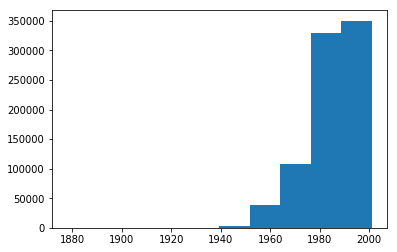

In [22]:
#I make a quick graph of the member_birth values
x_ = df_.member_birth_year.values
plt.hist(x = x_);

This graph already tell us a lot of information. That is, Most of the data is concentrated in the right part of the graph, which indicates that our data is not that old. Let's compute the porcentage that is appreciated in this graph

In [23]:
#Let's see how much data there is before 1940
data_left = (df_.member_birth_year<1940).sum()
data_left

900

In [24]:
#Here I compute the porcentage of the total
(data_left)/df_.shape[0]*100

0.10843412687033809

We see that is around 0.1% of the total data.

Now let's make a zoom in that part to have a clear understanding of the distribution of that data.

In [25]:
def gr(k,w):
    bins = np.arange(1940,df_.member_birth_year.max()+k,k)
    birth_new = df_[df_.member_birth_year>=1940].member_birth_year.values
    plt.hist(x = birth_new,bins = bins);
    x_ticks = np.arange(1940,df_.member_birth_year.max()+w,w)
    plt.xticks(x_ticks, x_ticks, rotation='vertical')

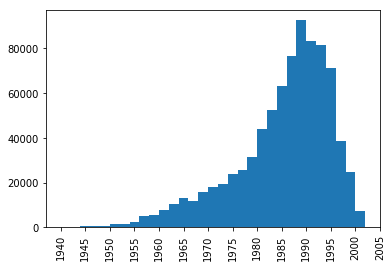

In [26]:
gr(2,5)

I created the function gr in order to change the bins size, since it could generate certain bias using a big (or a small k). I intended to use it to find a fair enough k, but it seems that this is ok. We see that the graph is left skewed. Even though this is the case, I will try with k = 1.

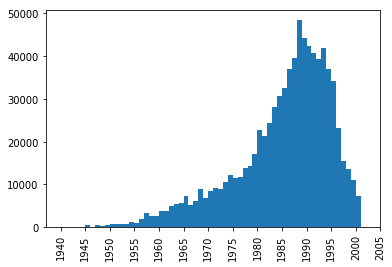

In [27]:
gr(1,5)

We see that with k = 1 I included a misinterpreation, and now it looks less left skewed, so let's maintain the previous graph for the sake of the observation.

### Observations:
- The graph of member_birth_year is left skewed with maximum around 1987
- More than 99% of the data was born after 1940

Let's continue with our exploratory analysis:
- Now, let's focus on what is the relationship between the start and endpoint

In [28]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974,Male,No
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,1994,Male,No


In [29]:
#We save both the start longitude and latitude in variables
start_lati = df_.start_station_latitude.values
start_long = df_.start_station_longitude.values

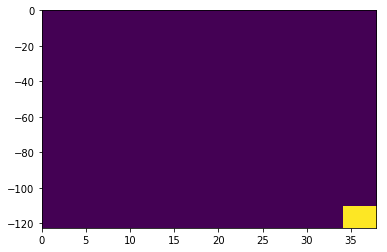

In [30]:
#We make a quick graph
plt.hist2d(x = start_lati, y = start_long);

In [31]:
#This graph looks extremely weird, so let's see the data:
df_.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,829997.000000,829277.000000,829997.000000,829997.000000,829277.000000,829997.000000,829997.000000,829997.000000
mean,747.253142,139.408896,37.771020,-122.353518,137.739621,37.770396,-122.350615,1984.731395
std,1743.311064,113.541255,0.107404,0.177889,113.392885,0.201843,0.581523,10.060782
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,1878.000000
25%,334.000000,46.000000,37.770407,-122.413004,44.000000,37.770407,-122.411738,1980.000000
50%,532.000000,104.000000,37.780955,-122.398436,101.000000,37.781010,-122.398279,1987.000000
75%,829.000000,239.000000,37.797280,-122.289415,236.000000,37.797320,-122.290230,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,2001.000000


In [32]:
#Let's check the extreme case where start_station_latitude== 0.0
df_[df_.start_station_latitude==0.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40680,175,2019-04-24 16:56:54.5160,2019-04-24 16:59:50.4290,420.0,SF Test Station,0.0,0.0,81.0,Berry St at 4th St,37.77588,-122.39317,1161,Subscriber,1983,Male,No


In [33]:
df_[df_.start_station_longitude==0.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40680,175,2019-04-24 16:56:54.5160,2019-04-24 16:59:50.4290,420.0,SF Test Station,0.0,0.0,81.0,Berry St at 4th St,37.77588,-122.39317,1161,Subscriber,1983,Male,No


This is most likely missing data. So let's remove it

In [34]:
df_ = df_[df_.start_station_longitude!=0.0]

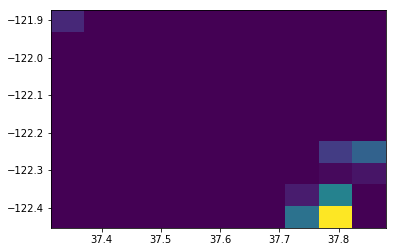

In [35]:
start_lati = df_.start_station_latitude.values
start_long = df_.start_station_longitude.values
plt.hist2d(x = start_lati, y = start_long);

This looks way more feasible, even though that is the case, let's explore this data to see if we can get any better

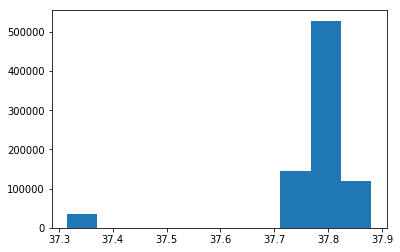

In [36]:
plt.hist(df_.start_station_latitude.values);

In [37]:
#Let's compute the ammount of data that is less than 37.7 
(df_.start_station_latitude.values<37.7).sum()/df_.shape[0]

0.044776119402985072

So that data is less than 5% of the total data. With this in mind, let's focus on the right part of the graph

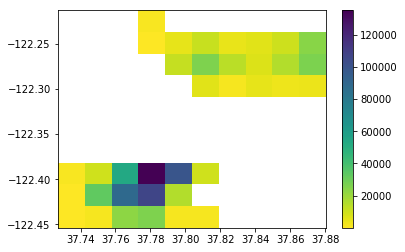

In [38]:
df_left = df_[df_.start_station_latitude>=37.7]
lat = df_left.start_station_latitude.values
long = df_left.start_station_longitude.values
plt.hist2d(x=lat,y = long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

This graph shows a pattern that is way clearer than the previous two. Now let's compare this graph with its respective end

In [39]:
df_left.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,1989,Male,No


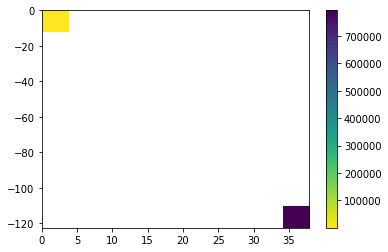

In [40]:
end_lat = df_left.end_station_latitude
end_long = df_left.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

We see than once more there is at least one point that is extreme, let's analyze it

In [41]:
df_left_aux = df_left[df_left.end_station_latitude==0]
df_left_aux

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1177,2365,2019-04-30 18:21:42.6100,2019-04-30 19:01:08.1460,50.0,2nd St at Townsend St,37.780526,-122.390288,420.0,SF Test Station,0.0,0.0,1612,Subscriber,1995,Female,No
1943,1964,2019-04-30 17:31:19.6460,2019-04-30 18:04:04.5180,98.0,Valencia St at 16th St,37.765052,-122.421866,420.0,SF Test Station,0.0,0.0,3507,Subscriber,1981,Female,No
2097,546,2019-04-30 17:45:38.4520,2019-04-30 17:54:45.2580,370.0,Jones St at Post St,37.787327,-122.413278,420.0,SF Test Station,0.0,0.0,1142,Subscriber,1991,Female,Yes
2176,630,2019-04-30 17:39:33.5070,2019-04-30 17:50:04.3140,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420.0,SF Test Station,0.0,0.0,3500,Subscriber,1991,Male,No
2629,433,2019-04-30 17:17:10.4860,2019-04-30 17:24:23.9190,11.0,Davis St at Jackson St,37.797280,-122.398436,420.0,SF Test Station,0.0,0.0,1181,Subscriber,1995,Male,No
2712,1233,2019-04-30 16:58:41.2090,2019-04-30 17:19:14.6890,81.0,Berry St at 4th St,37.775880,-122.393170,420.0,SF Test Station,0.0,0.0,2535,Subscriber,1970,Male,No
2744,1306,2019-04-30 16:55:35.9240,2019-04-30 17:17:22.1620,80.0,Townsend St at 5th St,37.775235,-122.397437,420.0,SF Test Station,0.0,0.0,462,Subscriber,1992,Male,No
3035,764,2019-04-30 16:44:12.3510,2019-04-30 16:56:56.5390,16.0,Steuart St at Market St,37.794130,-122.394430,420.0,SF Test Station,0.0,0.0,1880,Customer,1976,Male,No
15286,1491,2019-04-28 18:40:41.2880,2019-04-28 19:05:33.0630,377.0,Fell St at Stanyan St,37.771917,-122.453704,420.0,SF Test Station,0.0,0.0,150,Customer,1981,Male,No
15339,680,2019-04-28 18:40:08.3240,2019-04-28 18:51:28.3570,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420.0,SF Test Station,0.0,0.0,311,Subscriber,1981,Female,No


We see that, as the last case, there is no much data, so let's work with the complement of df_left_aux instead.

In [42]:
#We remove that point
df_left_auxc = df_left[df_left.end_station_latitude!=0]

In [43]:
#We check if there is something else that is weird
df_left_auxc.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000
mean,753.589872,132.038217,37.791451,-122.375333,130.259312,37.791604,-122.374923,1984.508749
std,1754.982070,110.317874,0.031464,0.061251,110.021813,0.031157,0.060593,10.040472
min,61.000000,3.000000,37.726943,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,336.000000,43.000000,37.771917,-122.413579,42.000000,37.772000,-122.412408,1980.000000
50%,537.000000,96.000000,37.781650,-122.399018,93.000000,37.783172,-122.398870,1987.000000
75%,839.000000,203.000000,37.798572,-122.390288,200.000000,37.798572,-122.390288,1992.000000
max,86114.000000,412.000000,37.880222,-122.213037,412.000000,37.880222,-121.883215,2001.000000


This looks like a better exploration but there is (still) a big gap between the min latitude and longitude compared to the rest of the data. Let's explore that more:

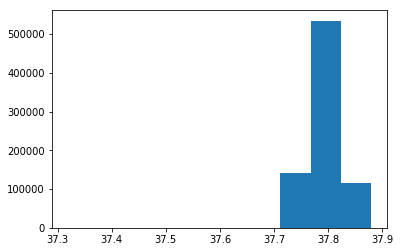

In [44]:
#Let's see where the data concentrates
plt.hist(df_left_auxc.end_station_latitude.values);

Let's see how much data we lose if we focus from 37.7

In [45]:
#Porcentage of the data less than 37.7
(df_left_auxc.end_station_latitude.values<37.7).sum()/df_left_auxc.shape[0]

2.5226597915778479e-06

There is almost no data, so let's focus on the right part.

In [46]:
#We delete the rest of the data
df_aux = df_left_auxc[df_left_auxc.end_station_latitude.values>=37.7]

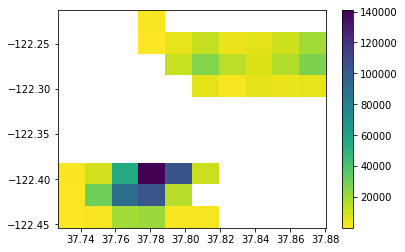

In [47]:
#We make the graph
end_lat = df_aux.end_station_latitude
end_long = df_aux.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

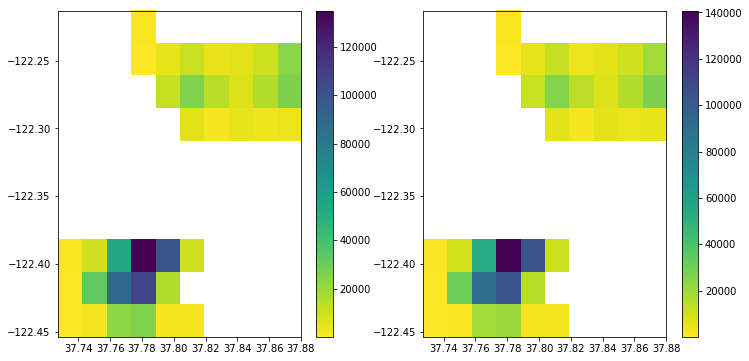

In [48]:
#Now we compare the two graphs, plotting one next to the other one
plt.figure(figsize= [12,6])

plt.subplot(1,2,1)

lat = df_aux.start_station_latitude.values
long = df_aux.start_station_longitude.values

plt.hist2d(x=lat,y = long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

plt.subplot(1,2,2)

end_lat = df_aux.end_station_latitude
end_long = df_aux.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

### Observations:
- The start and endpoint are almost identical, this could be due to the fact that the amount of data is big.
- There are two big areas of concentration.
- There is a point of maximum concentration around (37.78, -122.40)

- As we saw previously, there is a distribution with two main places. But, how about are this distributions related to the time that people ride the bike?

In [49]:
#Now we reduce the data so that we can group it
df_3 = df_aux
df_3 = df_3.loc[:,['start_station_latitude','start_station_longitude','duration_sec']]
df_3.head()

,start_station_latitude,start_station_longitude,duration_sec
0,37.775745,-122.213037,80825
1,37.785881,-122.408915,65900
2,37.870139,-122.268422,62633
3,37.770083,-122.429156,44680
5,37.870139,-122.268422,6733


In [50]:
#Let's check that we can apply the group_by function without problem:
df_3.dtypes

start_station_latitude     float64
start_station_longitude    float64
duration_sec                 int64
dtype: object

In [51]:
#We group by latitude and longitude, and we add durations:
w = df_3.groupby(['start_station_latitude','start_station_longitude'],as_index = False).sum()

In [52]:
w.head()

,start_station_latitude,start_station_longitude,duration_sec
0,37.726943,-122.406600,175582
1,37.729279,-122.392896,339488
2,37.730168,-122.398963,194130
3,37.731727,-122.390056,399297
4,37.732813,-122.434140,114248


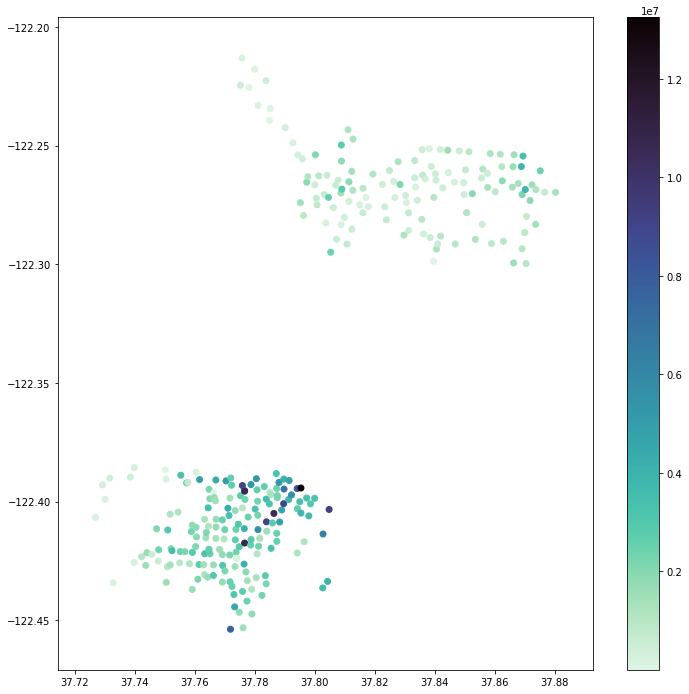

In [53]:
import seaborn as sbn
plt.figure(figsize = (12,12))
plt.scatter(data = w, x = 'start_station_latitude', y = 'start_station_longitude', c = 'duration_sec',
           cmap = 'mako_r')
plt.colorbar();

### Observations
- The group located in the bottom part of the screen has more time consumed
- The distribution of points in the bottom part is more concentrated, the top group is more spread.

# Saving data:

In [54]:
l = !ls
l = list(l)
if 'final' not in l:
    !mkdir final

In [55]:
import os
os.chdir(os.getcwd()+'/final')

In [56]:
w.to_csv('df3.csv',index=False)

In [57]:
df_.to_csv('df1.csv',index = False)

In [58]:
df_aux.to_csv('df2.csv',index = False)